# MNIST Handwriting Classification Using Keras and TensorFlow

## Import Python Packages

In [16]:
#TensorFlow
import tensorflow as tf

#MatPlotLib
import matplotlib.pyplot as plt

#Keras Modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

## Import MNIST Dataset

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Looking at Image from Dataset

5


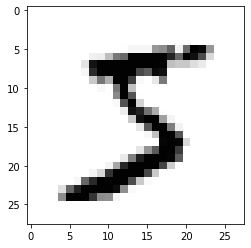

In [18]:
test_image = 0
print(y_train[test_image])
plt.imshow(x_train[test_image], cmap="Greys")

## Looking at the Shape of MNIST and Subsets

In [19]:
print("X Train", x_train.shape)
print("Y Train", y_train.shape)
print("X Test", x_test.shape)
print("Y Test", y_test.shape)

X Train (60000, 28, 28)
Y Train (60000,)
X Test (10000, 28, 28)
Y Test (10000,)


## Normalize RGB Values

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Building the Neural Network

In [23]:
model = Sequential()

model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

## Compiling & Fitting the NN

In [25]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(x = x_train, y = y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2015 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0797 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0566 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0363 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0289 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0257 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0220 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0173 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 26s 14m

## Evaluating the Model

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0649 - accuracy: 0.9847


[0.06489630043506622, 0.9847000241279602]

98.5% Accuracy

## Trying it Out

9


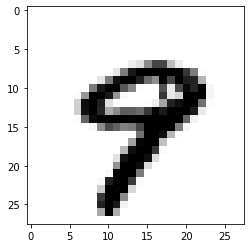

In [33]:
image_index = 0
plt.imshow(x_test[i].reshape(28, 28), cmap = "Greys")
prediction = model.predict(x_test[i].reshape(1, 28, 28, 1))
print(prediction.argmax())

## Conclusion

Our model works! We have successfully built a convolutional neural network to classify handwritten digits with TensorFlow's Keras API. The accuracy achieved was 98% with 10 epochs. This wouldn't be sufficient for applications such as autonomous vehicles, but for our purposes it work just fine.